# coleta e pre processamento

## importação das bibliotecas

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
import datetime as dt
from scipy import stats

## pre-processamento

In [3]:
#ajuste da importação 'latin1'
df = pd.read_csv('data.csv', encoding='latin1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# checando valores nulos
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* Se os dados tiverem a presença de outliers considere substituir os valores ausentes pela mediana do conjunto, pois a mediana não é afetada por outliers. Caso contrário, substitua os valores ausentes pela média do conjunto. Em caso de dado categórico, podemos substituir os valores NaN pela moda do conjunto.

In [8]:
#substituir valores nulos description : categóricos >>> moda

# Calcula a moda da coluna 'Description'
description_mode = df['Description'].mode()[0]

# Substitui valores nulos pela moda
df['Description'].fillna(description_mode, inplace=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_19704\1308949155.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(description_mode, inplace=True)


In [9]:
#retirar valores nulos do customer >>> cada um tem seu ID
df.dropna(subset=['CustomerID'],inplace=True)

In [10]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### remoção de duplicatas

In [11]:
df.duplicated().sum()


np.int64(5225)

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.duplicated().sum()


np.int64(0)

### Criação do box plot e remoção de outliers no preço

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba54760190>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54763b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54763890>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba54763d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54763ed0>],
 'means': []}

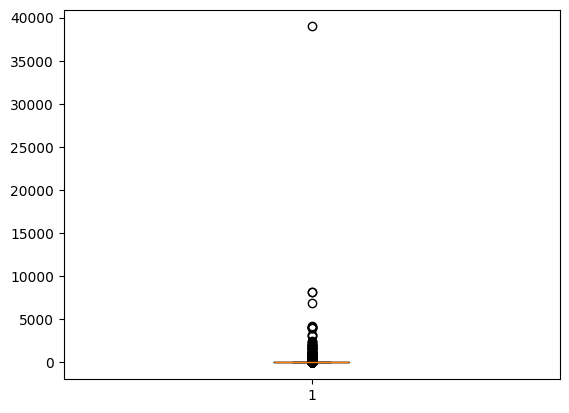

In [14]:
plt.boxplot(df['UnitPrice'])


In [15]:
q1=df['UnitPrice'].quantile(.25)
q3=df['UnitPrice'].quantile(.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q3+1.5*IQR
df=df[(df['UnitPrice']>lowerbound)&(df['UnitPrice']<upperbound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba54826990>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54826c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54826850>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba54826e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54826fd0>],
 'means': []}

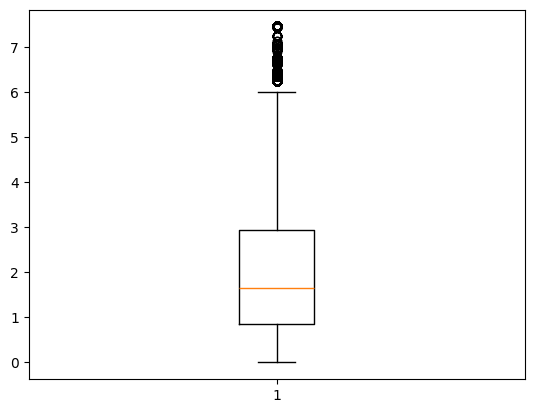

In [16]:
plt.boxplot(df['UnitPrice'])

### tratamento do quantity

In [ ]:
# nova coluna 'Sales' com valores positivos de 'Quantity'
df['Vendas'] = df['Quantity'].apply(lambda x: x if x > 0 else 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba548afb10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba548afd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba548af9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba548d0050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba548d0190>],
 'means': []}

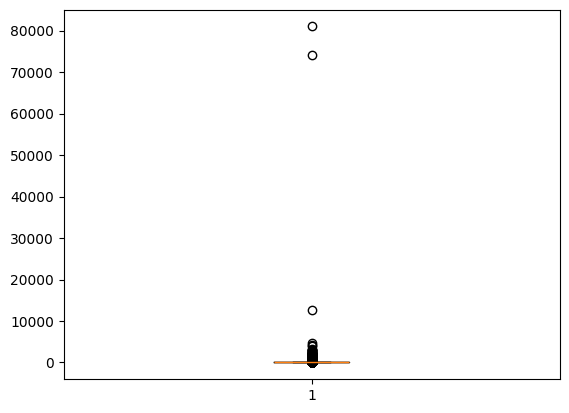

In [18]:
plt.boxplot(df['Vendas'])


### Tratamento do Quantity e valor: ajustar os valores para o mesmo id=mesmo valor

In [ ]:
# Encontra o maior valor de UnitPrice para cada ProductID
max_price_per_product = df.groupby('StockCode')['UnitPrice'].max().reset_index()

# Renomeia a coluna UnitPrice para Valor para facilitar o merge
max_price_per_product.rename(columns={'UnitPrice': 'Valor do produto'}, inplace=True)

# Realiza o merge para adicionar a coluna Valor ao DataFrame original
df = pd.merge(df, max_price_per_product, on='StockCode', how='left')

# Atualiza todos os valores de UnitPrice para o Valor correspondente
df['UnitPrice'] = df['Valor do produto']

# Remove a coluna auxiliar Valor
df.drop(columns=['Valor do produto'], inplace=True)

### padronização do unit price

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df['UnitPrice_scaler']=scaler.fit_transform(df[['UnitPrice']])

In [21]:
df[['UnitPrice','UnitPrice_scaler']]


,UnitPrice,UnitPrice_scaler
0,5.79,1.383062
1,3.75,0.309575
2,4.15,0.520063
3,7.46,2.261847
4,4.25,0.572684
...,...,...
365172,1.63,-0.806009
365173,4.13,0.509538
365174,4.15,0.520063
365175,4.15,0.520063


#### Por Que Usar o StandardScaler?
> Padronizar os dados é uma prática comum em Machine Learning e análise de dados por várias razões:

* Acelera a Convergência de Algoritmos: Muitos algoritmos de Machine Learning, como redes neurais e K-Means, convergem mais rápido se os dados estiverem padronizados.
* Melhora o Desempenho de Modelos: Modelos como SVM e regressão logística são sensíveis à escala dos dados e têm melhor desempenho em dados padronizados.
* Facilita a Comparação de Variáveis: Em análises com várias variáveis, padronizar coloca todas na mesma escala, facilitando a comparação.

### conversão da data

In [22]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')


In [23]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Visu após pre processamento

In [24]:
#valore positivos de quantity * valor do produto
df['Receita']=df['Vendas']*df['UnitPrice']


> remoção da coluna Quantity para limpar o df

In [25]:
# Remove a coluna 'Quantity' do DataFrame
df.drop(columns=['Quantity'], inplace=True)


In [26]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,Vendas,UnitPrice_scaler,Year,Month,Receita
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,5.79,17850.0,United Kingdom,6,1.383062,2010,12,34.74
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.75,17850.0,United Kingdom,6,0.309575,2010,12,22.50
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,4.15,17850.0,United Kingdom,8,0.520063,2010,12,33.20
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,7.46,17850.0,United Kingdom,6,2.261847,2010,12,44.76
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,6,0.572684,2010,12,25.50


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365177 entries, 0 to 365176
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         365177 non-null  object        
 1   StockCode         365177 non-null  object        
 2   Description       365177 non-null  object        
 3   InvoiceDate       365177 non-null  datetime64[ns]
 4   UnitPrice         365177 non-null  float64       
 5   CustomerID        365177 non-null  float64       
 6   Country           365177 non-null  object        
 7   Vendas            365177 non-null  int64         
 8   UnitPrice_scaler  365177 non-null  float64       
 9   Year              365177 non-null  int32         
 10  Month             365177 non-null  int32         
 11  Receita           365177 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 30.6+ MB


# EDA

In [28]:
# Estatísticas descritivas básicas
df.describe()


,InvoiceDate,UnitPrice,CustomerID,Vendas,UnitPrice_scaler,Year,Month,Receita
count,365177,365177.000000,365177.000000,365177.000000,3.651770e+05,365177.000000,365177.000000,365177.000000
mean,2011-07-11 20:30:42.767644160,3.161699,15295.354639,13.851527,1.895159e-17,2010.934599,7.636968,35.095044
min,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,-1.663746e+00,2010.000000,1.000000,0.000000
25%,2011-04-07 18:03:00,1.630000,13963.000000,2.000000,-8.060091e-01,2011.000000,5.000000,5.790000
50%,2011-08-02 10:34:00,2.950000,15159.000000,6.000000,-1.114001e-01,2011.000000,8.000000,15.000000
75%,2011-10-20 19:17:00,4.250000,16794.000000,12.000000,5.726845e-01,2011.000000,11.000000,30.240000
max,2011-12-09 12:50:00,7.460000,18287.000000,80995.000000,2.261847e+00,2011.000000,12.000000,168469.600000
std,NaN,1.900352,1713.357575,188.279148,1.000001e+00,0.247233,3.409031,341.370774


> vendas por ano

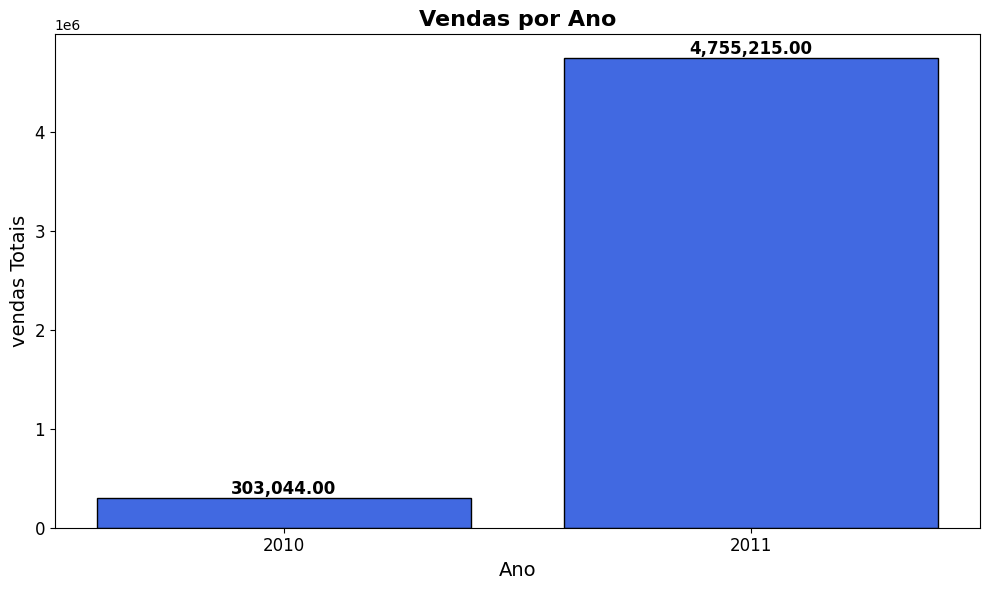

In [ ]:
import matplotlib.pyplot as plt

# Agrupa os dados por ano e calcula a receita total
receita_por_ano = df.groupby('Year')['Vendas'].sum()

# Converte o índice (anos) para string para evitar valores decimais no eixo x
receita_por_ano.index = receita_por_ano.index.astype(str)

# Gera o gráfico de colunas
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(receita_por_ano.index, receita_por_ano.values, color='royalblue', edgecolor='black')

# Adiciona título e rótulos aos eixos com ajustes de formatação
plt.title('Vendas por Ano', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('vendas Totais', fontsize=14)

# Adiciona os valores em cima de cada barra com formatação de milhares e duas casas decimais
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Ajuste dos ticks para melhor visualização
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajusta o layout para evitar corte dos rótulos
plt.tight_layout()
plt.show()


> receita por ano

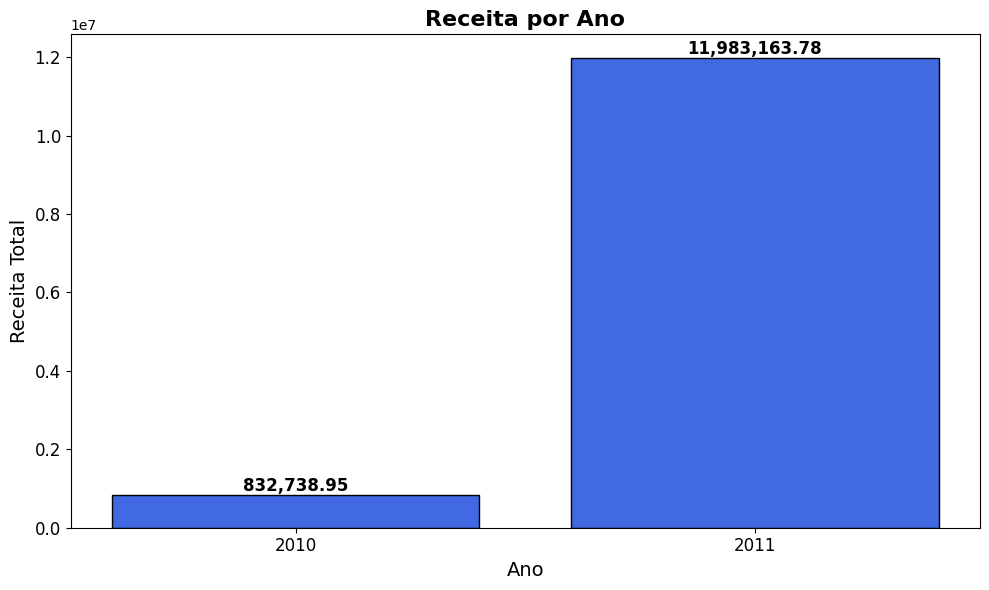

In [ ]:
# Agrupa os dados por ano e calcula a receita total
receita_por_ano = df.groupby('Year')['Receita'].sum()

# Converte o anos para string para evitar valores decimais no eixo x
receita_por_ano.index = receita_por_ano.index.astype(str)

# Gera o gráfico de colunas
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(receita_por_ano.index, receita_por_ano.values, color='royalblue', edgecolor='black')

# Adiciona título e rótulos aos eixos com ajustes de formatação
plt.title('Receita por Ano', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Receita Total', fontsize=14)

# Adiciona os valores em cima de cada barra com formatação de milhares e duas casas decimais
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Ajuste dos ticks para melhor visualização
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajusta o layout para evitar corte dos rótulos
plt.tight_layout()

# Exibe o gráfico
plt.show()


> paises com maiores compras

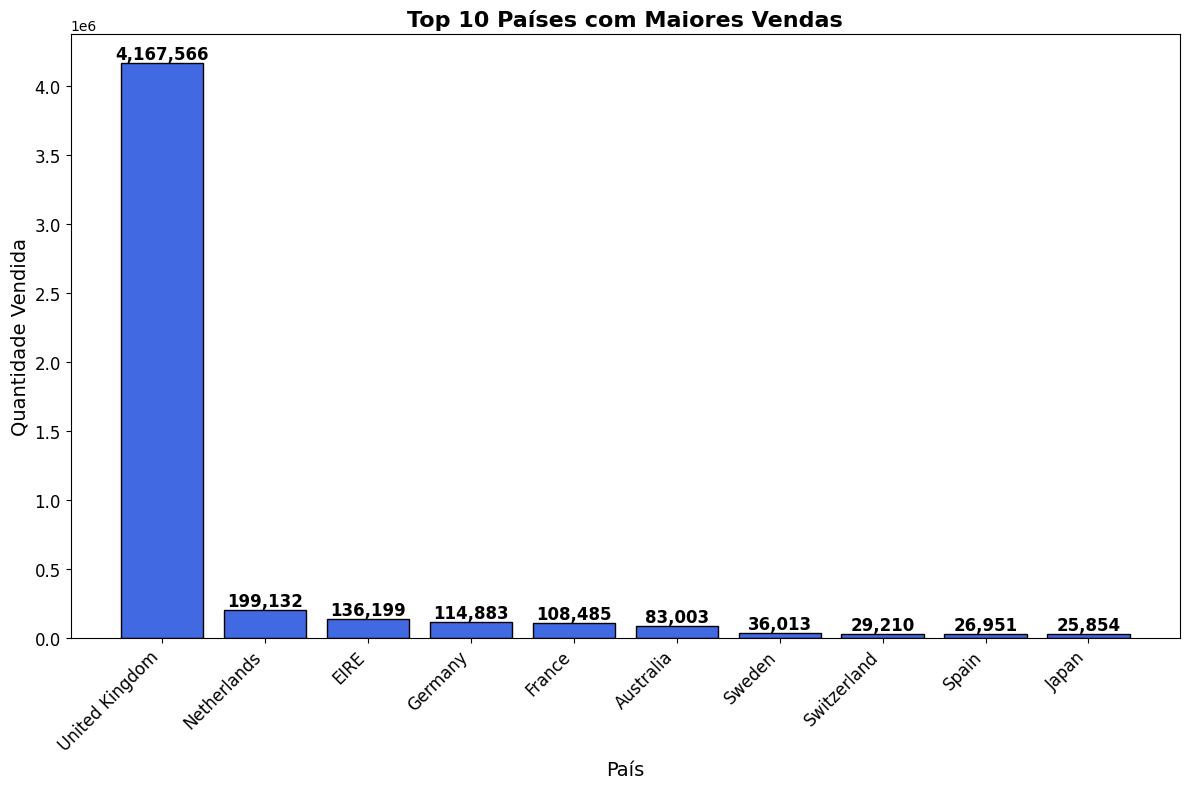

In [ ]:
# Agrupa os dados por país e calcula a soma das vendas
vendas_por_pais = df.groupby('Country')['Vendas'].sum()

# Ordena os países pela quantidade total de vendas em ordem decrescente e seleciona os 10 primeiros
top_10_paises = vendas_por_pais.sort_values(ascending=False).head(10)

# Gera o gráfico de colunas
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(top_10_paises.index, top_10_paises.values, color='royalblue', edgecolor='black')

# Adiciona título e rótulos aos eixos
plt.title('Top 10 Países com Maiores Vendas', fontsize=16, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Adiciona os valores em cima de cada barra com formatação de milhares
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Rotaciona os rótulos dos países para melhor visualização
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Ajusta o layout para evitar corte dos rótulos
plt.tight_layout()

# Exibe o gráfico
plt.show()


> Produtos com maiores vendas

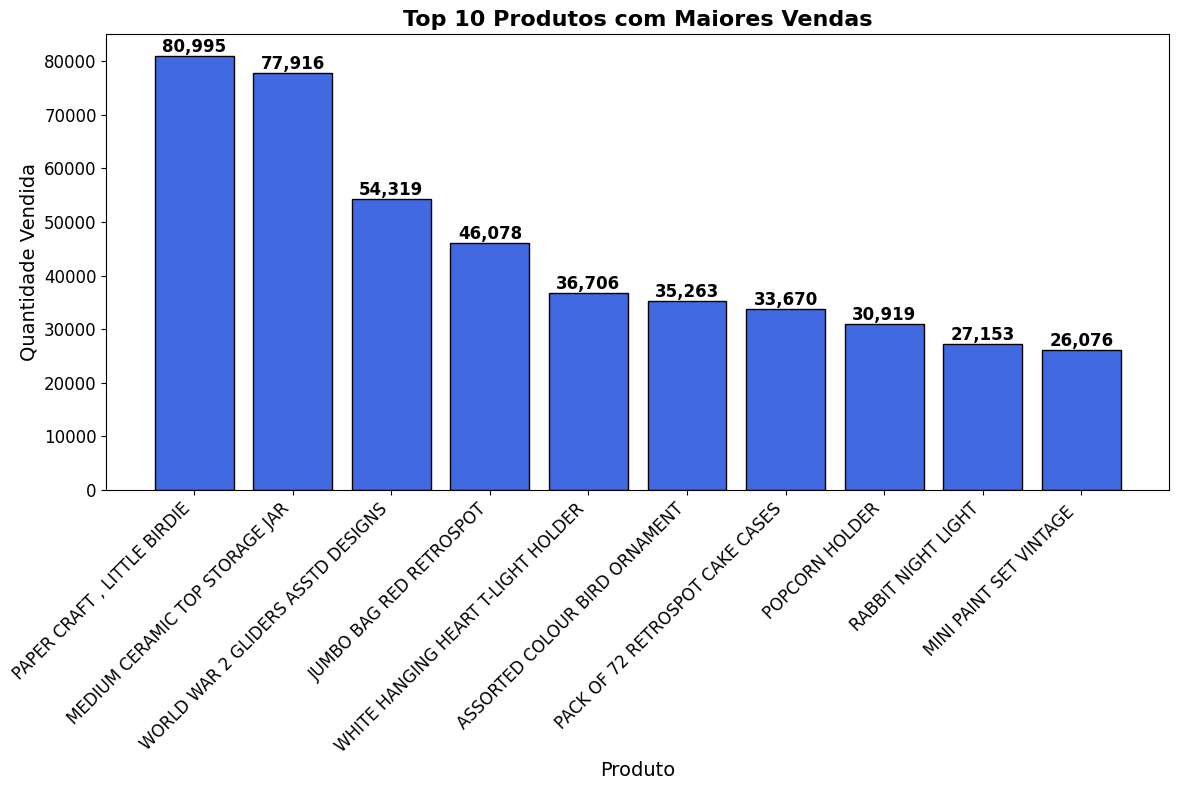

In [ ]:
# Agrupa os dados por produto e calcula a soma das vendas
vendas_por_produto = df.groupby('Description')['Vendas'].sum()

# Ordena os produtos pela quantidade total de vendas em ordem decrescente e seleciona os 10 primeiros
top_10_produtos = vendas_por_produto.sort_values(ascending=False).head(10)

# Gera o gráfico de colunas
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(top_10_produtos.index, top_10_produtos.values, color='royalblue', edgecolor='black')

# Adiciona título e rótulos aos eixos
plt.title('Top 10 Produtos com Maiores Vendas', fontsize=16, fontweight='bold')
plt.xlabel('Produto', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Adiciona os valores em cima de cada barra com formatação de milhares
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Rotaciona os rótulos dos produtos para melhorar a visualização
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Ajusta o layout para evitar corte dos rótulos
plt.tight_layout()

# Exibe o gráfico
plt.show()


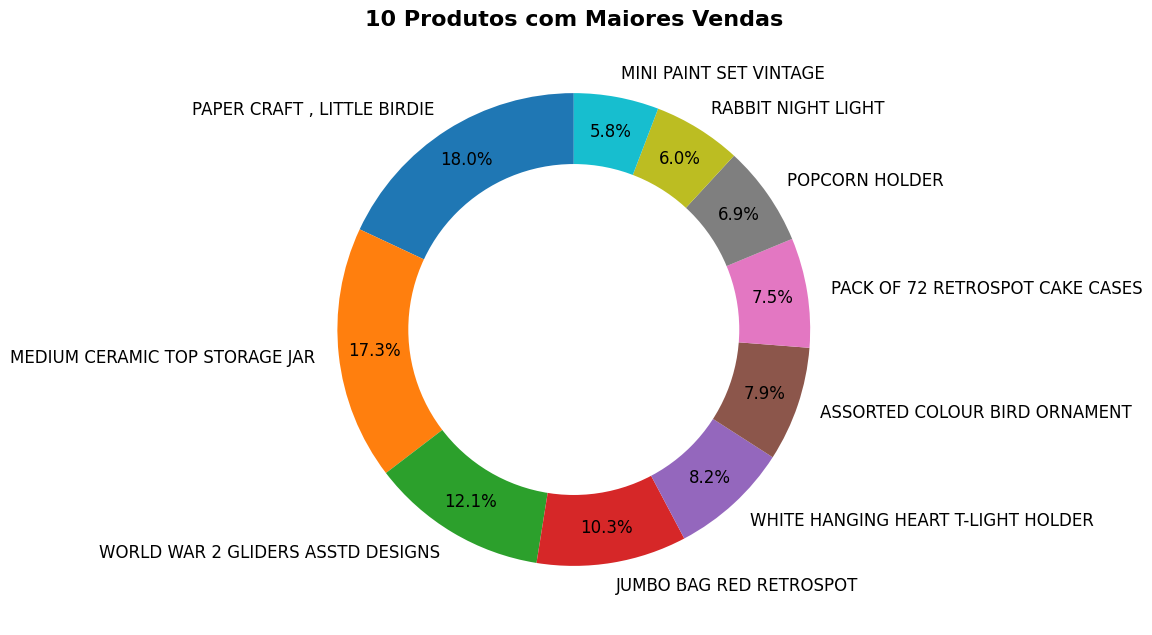

In [49]:
# Agrupa os dados por produto e calcula a soma das vendas
vendas_por_produto = df.groupby('Description')['Vendas'].sum()

# Ordena os produtos pela quantidade total de vendas em ordem decrescente e seleciona os 10 primeiros
top_10_produtos = vendas_por_produto.sort_values(ascending=False).head(10)

# Gera o gráfico de rosca
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.get_cmap("tab10").colors  # Usa uma paleta de cores harmoniosa

# Cria o gráfico de rosca
ax.pie(top_10_produtos, labels=top_10_produtos.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors, textprops={'fontsize': 12})

# Adiciona o círculo branco no centro para criar o efeito de rosca
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Define o título com formatação melhorada
plt.title('10 Produtos com Maiores Vendas', fontsize=16, fontweight='bold')

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


> produtos com preço mais alto têm menor volume, mas mais receita?

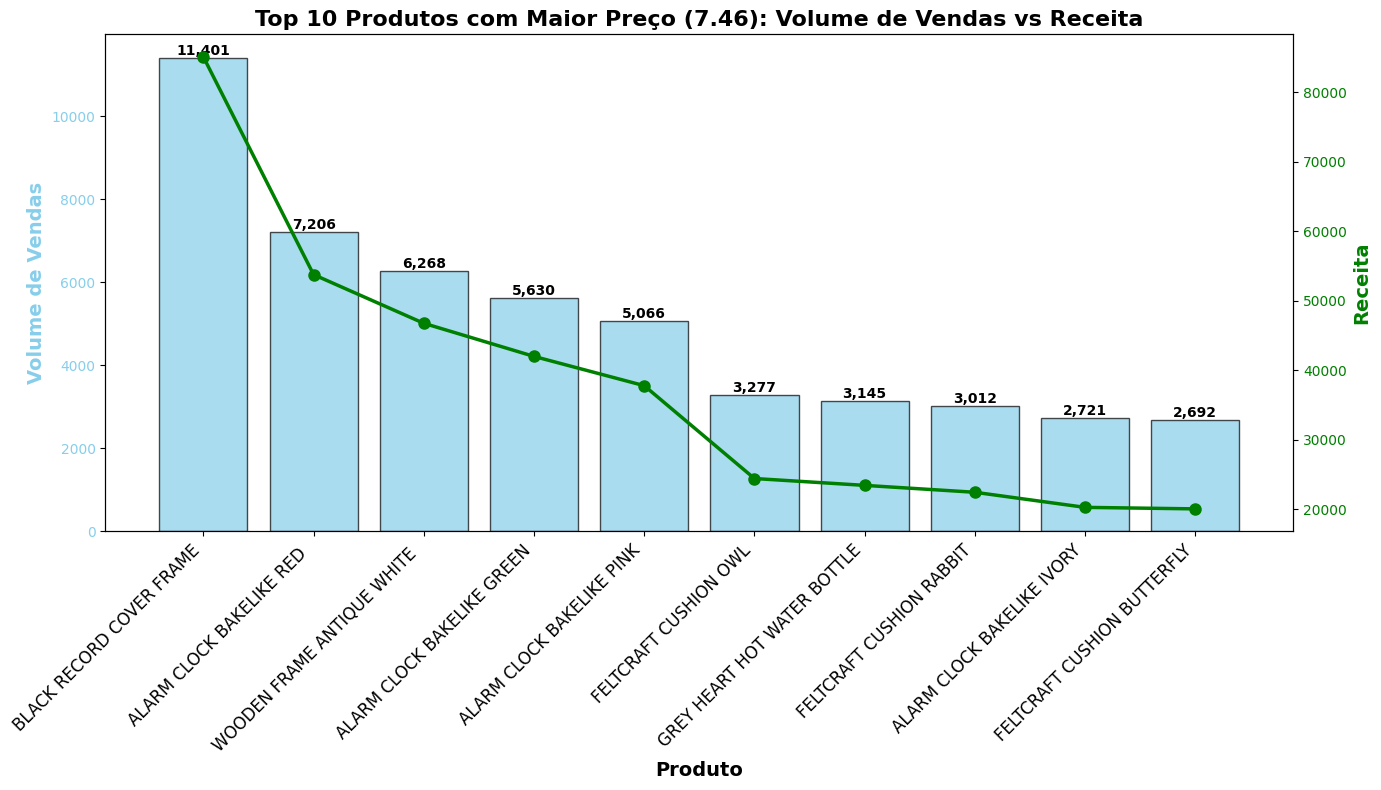

In [50]:
import matplotlib.pyplot as plt

# Define o maior preço
maior_preco = 7.46

# Filtra os produtos que têm o maior preço
produtos_maior_preco = df[df['UnitPrice'] == maior_preco]

# Agrupa por 'Description' para calcular o volume total de vendas e receita
produtos_maior_preco_stats = produtos_maior_preco.groupby('Description').agg(
    {'Vendas': 'sum', 'Receita': 'sum'}
).reset_index()

# Ordena os produtos pelo volume de vendas e seleciona os 10 primeiros
top_10_produtos_maior_preco = produtos_maior_preco_stats.sort_values(by='Vendas', ascending=False).head(10)

# Cria o gráfico de barras e linha
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras para o volume de vendas com cor suave e transparência
bars = ax1.bar(top_10_produtos_maior_preco['Description'], top_10_produtos_maior_preco['Vendas'], color='skyblue', edgecolor='black', alpha=0.7, label='Volume de Vendas')
ax1.set_xlabel('Produto', fontsize=14, fontweight='bold')
ax1.set_ylabel('Volume de Vendas', color='skyblue', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adiciona os valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adiciona uma segunda escala y para receita com linha e marcadores
ax2 = ax1.twinx()
ax2.plot(top_10_produtos_maior_preco['Description'], top_10_produtos_maior_preco['Receita'], color='green', marker='o', markersize=8, linewidth=2.5, label='Receita')
ax2.set_ylabel('Receita', color='green', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='green')

# Título com formatação aprimorada
plt.title('Top 10 Produtos com Maior Preço (7.46): Volume de Vendas vs Receita', fontsize=16, fontweight='bold')

# Ajusta o layout para evitar corte dos rótulos
fig.tight_layout()

# Exibe o gráfico
plt.show()


> análise dos produtos menos vendidos

In [39]:
# Agrupa os dados por produto e calcula o volume total de vendas e o preço médio
produto_stats = df.groupby('Description').agg(
    {'Vendas': 'sum', 'UnitPrice': 'mean'}
).reset_index()

# Ordena os produtos pelo volume de vendas em ordem crescente e seleciona os 10 menos vendidos
produtos_menos_vendidos = produto_stats.sort_values(by='Vendas').head(10)

# Seleciona apenas as colunas 'Description' e 'UnitPrice' para visualização
produtos_menos_vendidos_tabela = produtos_menos_vendidos[['Description', 'UnitPrice']]

# Exibe a tabela
produtos_menos_vendidos_tabela.reset_index(drop=True, inplace=True)
produtos_menos_vendidos_tabela


,Description,UnitPrice
0,FLAMINGO LIGHTS,4.95
1,VICTORIAN SEWING BOX LARGE,6.95
2,WHITE CHERRY LIGHTS,6.75
3,SWEETHEART KEY CABINET,5.55
4,PINK POODLE HANGING DECORATION,0.38
5,BLUE FLYING SINGING CANARY,3.75
6,SMALL TAHITI BEACH BAG,3.81
7,PINK LARGE JEWELED PHOTOFRAME,2.55
8,CRUK Commission,1.60
9,PORCELAIN HANGING BELL SMALL,1.45


> produtos mais vendidos

In [40]:
# Agrupa os dados por produto e calcula o volume total de vendas e o preço médio
produto_stats = df.groupby('Description').agg(
    {'Vendas': 'sum', 'UnitPrice': 'mean'}
).reset_index()

# Ordena os produtos pelo volume de vendas em ordem decrescente e seleciona os 10 mais vendidos
produtos_mais_vendidos = produto_stats.sort_values(by='Vendas', ascending=False).head(10)

# Seleciona apenas as colunas 'Description' e 'UnitPrice' para visualização
produtos_mais_vendidos_tabela = produtos_mais_vendidos[['Description', 'UnitPrice']]

# Exibe a tabela
produtos_mais_vendidos_tabela.reset_index(drop=True, inplace=True)
produtos_mais_vendidos_tabela


,Description,UnitPrice
0,"PAPER CRAFT , LITTLE BIRDIE",2.08
1,MEDIUM CERAMIC TOP STORAGE JAR,1.25
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.63
3,JUMBO BAG RED RETROSPOT,4.13
4,WHITE HANGING HEART T-LIGHT HOLDER,5.79
5,ASSORTED COLOUR BIRD ORNAMENT,1.69
6,PACK OF 72 RETROSPOT CAKE CASES,1.25
7,POPCORN HOLDER,1.63
8,RABBIT NIGHT LIGHT,4.13
9,MINI PAINT SET VINTAGE,1.63


> visualização de produtos mais frequentemente comprados juntos

In [55]:
import pandas as pd
from itertools import combinations
from collections import Counter


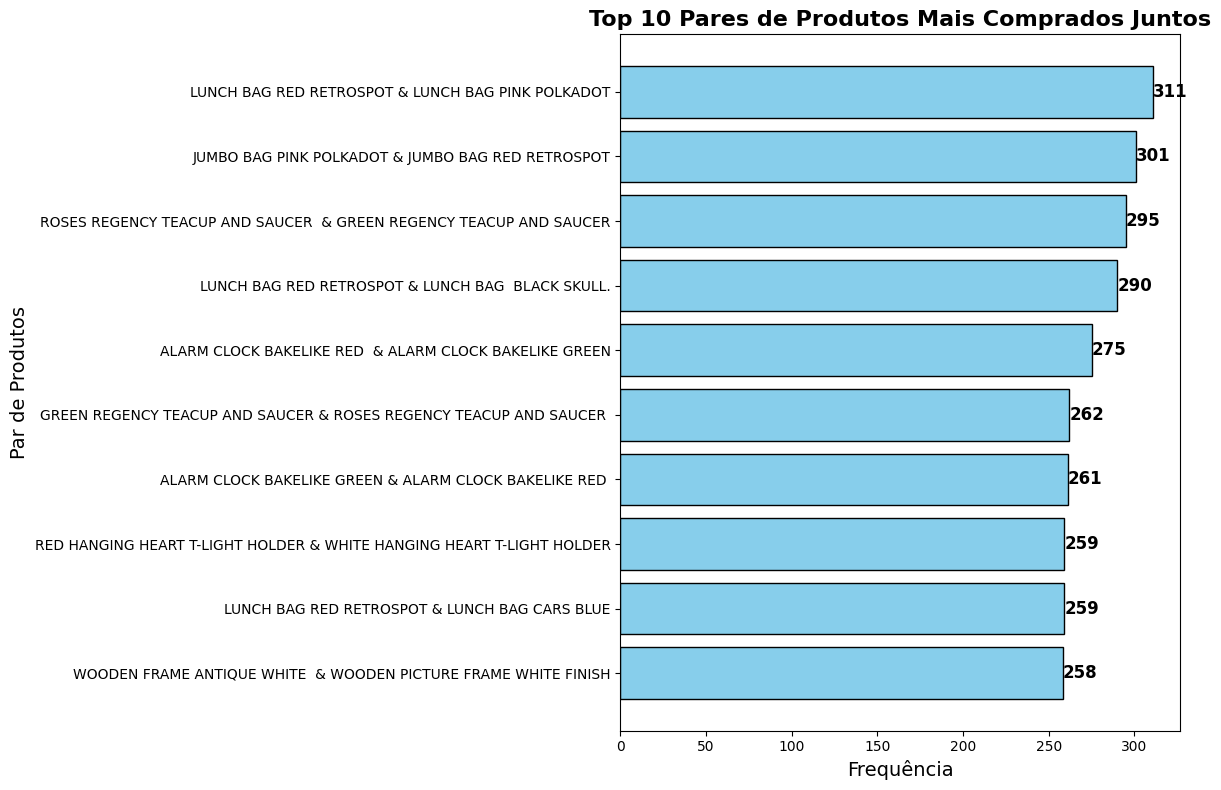

In [57]:
import matplotlib.pyplot as plt

# Seleciona os 10 pares mais frequentes
top_pairs = pair_counts_df.head(10)

# Configura o gráfico de barras horizontal
plt.figure(figsize=(12, 8))
plt.barh([f"{pair[0]} & {pair[1]}" for pair in top_pairs['Pair']], top_pairs['Frequency'], color='skyblue', edgecolor='black')
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Par de Produtos', fontsize=14)
plt.title('Top 10 Pares de Produtos Mais Comprados Juntos', fontsize=16, fontweight='bold')

# Inverte a ordem para que o par mais frequente apareça no topo
plt.gca().invert_yaxis()

# Adiciona os valores da frequência ao lado de cada barra
for index, value in enumerate(top_pairs['Frequency']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12, fontweight='bold')

# Exibe o gráfico
plt.tight_layout()
plt.show()
